In [33]:
from citipy import citipy
import random
import requests
import json
from latsandlongs import lats, lngs
from api_keys import openweather
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress


In [34]:
latitudes = []
longitudes = []

#I ran this once and saved the results to another file to keep the same results

#for n in range(0, 500):
#    latitudes.append(random.uniform(-90, 90))
#    longitudes.append(random.uniform(-180, 180))
print(len(lats))
print(len(lngs))
#print(latitudes)
#print(longitudes)

1500
1500


In [35]:
#print(latitudes)
#print(longitudes)

In [36]:
city_list = []
for x, y in zip(lats, lngs):
    city = citipy.nearest_city(x, y)
    country = city.country_code
    city = city.city_name
    tup = (city, country)
    city_list.append(tup)
    
    
    
print(len(city_list))

print(city_list) 

1500
[('upernavik', 'gl'), ('hobart', 'au'), ('mataura', 'pf'), ('tuktoyaktuk', 'ca'), ('yellowknife', 'ca'), ('vinh', 'vn'), ('pinsk', 'by'), ('jalu', 'ly'), ('arman', 'ru'), ('ponta do sol', 'cv'), ('butaritari', 'ki'), ('nikolskoye', 'ru'), ('mataura', 'pf'), ('atuona', 'pf'), ('faanui', 'pf'), ('gombong', 'id'), ('ushuaia', 'ar'), ('lebu', 'cl'), ('busselton', 'au'), ('yeppoon', 'au'), ('mataura', 'pf'), ('mataura', 'pf'), ('itoman', 'jp'), ('tiksi', 'ru'), ('sao joao da barra', 'br'), ('sassandra', 'ci'), ('obo', 'cf'), ('puerto ayora', 'ec'), ('ushuaia', 'ar'), ('port alfred', 'za'), ('carnarvon', 'au'), ('nyurba', 'ru'), ('ndele', 'cf'), ('georgetown', 'us'), ('carbonia', 'it'), ('vaini', 'to'), ('okha', 'ru'), ('arraial do cabo', 'br'), ('bengkulu', 'id'), ('lucapon', 'ph'), ('zharkovskiy', 'ru'), ('puerto ayora', 'ec'), ('turukhansk', 'ru'), ('shenzhen', 'cn'), ('mataura', 'pf'), ('itapirapua', 'br'), ('alta floresta', 'br'), ('san andres', 'co'), ('fukue', 'jp'), ('ushuaia', 

In [37]:
unique_count = 0
check = []
for n in city_list:
    if n not in check:
        check.append(n)
        unique_count+= 1
unique_count

643

In [38]:
#url = "http://api.openweathermap.org/data/2.5/weather?"
#city = "London"
city_name = city_list[2][0]
country_code = city_list[2][1]

print(city_name)
print(country_code)

# Build query URL
#query_url = url + "appid=" + api_key + "&q=" + city

url = f"http://api.openweathermap.org/data/2.5/weather?q={city_name},{country_code}&appid={openweather}&units=imperial"

#url ="api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=b8955f7da2194da93b48f9c32e6ade74"

print(url)

weather_response = requests.get(url)
weather_json = weather_response.json()

weather_json

mataura
pf
http://api.openweathermap.org/data/2.5/weather?q=mataura,pf&appid=b8955f7da2194da93b48f9c32e6ade74&units=imperial


{'cod': '404', 'message': 'city not found'}

In [39]:
pd.json_normalize(weather_json)

,cod,message
0,404,city not found


In [40]:
#KeyError
#print(weather_json['main']['temp'])
#weather_json['coord']['lat']

In [41]:
df_list = []

for c in check:
    city_name = c[0]
    country_code = c[1]
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city_name},{country_code}&appid={openweather}&units=imperial"
    weather_response = requests.get(url)
    weather_json = weather_response.json()

    df = pd.json_normalize(weather_json)
    df_list.append(df)
    
#    try:
#        plot_lats.append(weather_json['coord']['lat'])
#    except KeyError:
#        pass
    
#    try:
#        plot_temps.append(weather_json['main']['temp'])
#    except KeyError:
#        pass  

In [46]:
df = pd.concat(df_list)
df = df[df['dt'].notna()]

df

,weather,base,visibility,dt,timezone,id,name,cod,coord.lon,coord.lat,...,wind.gust,clouds.all,sys.country,sys.sunrise,sys.sunset,sys.type,sys.id,message,rain.1h,snow.1h
0,"[{'id': 804, 'main': 'Clouds', 'description': ...",stations,10000.0,1.620917e+09,-7200.0,3418910.0,Upernavik,200,-56.1549,72.7868,...,5.30,100.0,GL,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN
0,"[{'id': 801, 'main': 'Clouds', 'description': ...",stations,10000.0,1.620917e+09,36000.0,2163355.0,Hobart,200,147.3294,-42.8794,...,5.99,13.0,AU,1.620940e+09,1.620976e+09,2.0,2002195.0,NaN,NaN,NaN
0,"[{'id': 801, 'main': 'Clouds', 'description': ...",stations,10000.0,1.620917e+09,-21600.0,6170031.0,Tuktoyaktuk,200,-133.0374,69.4541,...,NaN,20.0,CA,1.620901e+09,1.620977e+09,1.0,942.0,NaN,NaN,NaN
0,"[{'id': 803, 'main': 'Clouds', 'description': ...",stations,10000.0,1.620917e+09,-21600.0,6185377.0,Yellowknife,200,-114.3525,62.4560,...,8.99,75.0,CA,1.620903e+09,1.620966e+09,2.0,19346.0,NaN,NaN,NaN
0,"[{'id': 804, 'main': 'Clouds', 'description': ...",stations,10000.0,1.620917e+09,25200.0,1562798.0,Vinh,200,105.6667,18.6667,...,7.99,88.0,VN,1.620858e+09,1.620905e+09,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,"[{'id': 803, 'main': 'Clouds', 'description': ...",stations,10000.0,1.620917e+09,0.0,2374583.0,Bubaque,200,-15.8333,11.2833,...,6.93,78.0,GW,1.620888e+09,1.620934e+09,NaN,NaN,NaN,NaN,NaN
0,"[{'id': 800, 'main': 'Clear', 'description': '...",stations,10000.0,1.620917e+09,-18000.0,5062458.0,West Fargo,200,-96.9004,46.8750,...,10.00,1.0,US,1.620903e+09,1.620957e+09,2.0,2011828.0,NaN,NaN,NaN
0,"[{'id': 804, 'main': 'Clouds', 'description': ...",stations,10000.0,1.620917e+09,0.0,2301464.0,Duayaw-Nkwanta,200,-2.1028,7.1724,...,2.86,100.0,GH,1.620885e+09,1.620930e+09,NaN,NaN,NaN,NaN,NaN
0,"[{'id': 800, 'main': 'Clear', 'description': '...",stations,10000.0,1.620917e+09,28800.0,2063042.0,Port Hedland,200,118.5667,-20.3167,...,NaN,5.0,AU,1.620858e+09,1.620899e+09,1.0,9585.0,NaN,NaN,NaN


In [47]:
print(df.columns)
df.to_csv('weather.csv')

Index(['weather', 'base', 'visibility', 'dt', 'timezone', 'id', 'name', 'cod',
       'coord.lon', 'coord.lat', 'main.temp', 'main.feels_like',
       'main.temp_min', 'main.temp_max', 'main.pressure', 'main.humidity',
       'main.sea_level', 'main.grnd_level', 'wind.speed', 'wind.deg',
       'wind.gust', 'clouds.all', 'sys.country', 'sys.sunrise', 'sys.sunset',
       'sys.type', 'sys.id', 'message', 'rain.1h', 'snow.1h'],
      dtype='object')


In [14]:
#It's a match
#print(len(plot_temps))
#len(plot_lats)
df['name'].nunique()

571

In [15]:
plot_lats = df['coord.lat'].tolist()
plot_temps = df['main.temp'].tolist()

In [16]:
north_df = df.loc[df["coord.lat"] > 0, :]
south_df = df.loc[df["coord.lat"] < 0, :]

In [28]:
#just to prove they imported
#print(plot_temps)
#print(plot_lats)
nlats = north_df['coord.lat']
ntemps = north_df['main.temp']

slats = south_df['coord.lat']
stemps = south_df['main.temp']

temps = [(nlats, ntemps, 30), (slats,stemps, -50)]

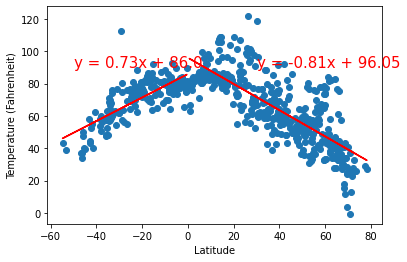

<Figure size 432x288 with 0 Axes>

In [29]:
plt.scatter(plot_lats, plot_temps)
#(nslope, nintercept, nrvalue, npvalue, nstderr) = linregress(nlats, ntemps)
#nregress_values = nlats * nslope + nintercept
#line_eq = "y = " + str(round(nslope,2)) + "x + " + str(round(nintercept,2))
#plt.annotate(line_eq,(0,90),fontsize=15,color="red")
#plt.plot(nlats,nregress_values,"r-")
for n in temps:
    (nslope, nintercept, nrvalue, npvalue, nstderr) = linregress(n[0], n[1])
    nregress_values = n[0] * nslope + nintercept
    line_eq = "y = " + str(round(nslope,2)) + "x + " + str(round(nintercept,2))
    plt.annotate(line_eq,(n[2],90),fontsize=15,color="red")
    plt.plot(n[0],nregress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Temperature (Fahrenheit)')
plt.show()
#This scatter plot shows the temperature based on how north and south the cities are
#As you get closer to the equator the temperature is more likely to be higher
plt.savefig('temp.png')

In [31]:
nlats = north_df['coord.lat']
ntemps = north_df['main.humidity']

slats = south_df['coord.lat']
stemps = south_df['main.humidity']

temps = [(nlats, ntemps, 30), (slats,stemps, -50)]

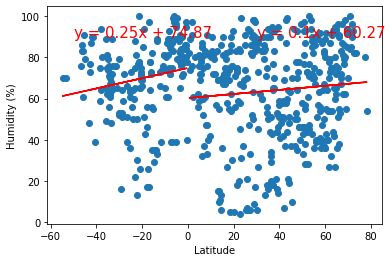

<Figure size 432x288 with 0 Axes>

In [32]:
plot_hum = df['main.humidity'].tolist()
plt.scatter(plot_lats, plot_hum)
for n in temps:
    (nslope, nintercept, nrvalue, npvalue, nstderr) = linregress(n[0], n[1])
    nregress_values = n[0] * nslope + nintercept
    line_eq = "y = " + str(round(nslope,2)) + "x + " + str(round(nintercept,2))
    plt.annotate(line_eq,(n[2],90),fontsize=15,color="red")
    plt.plot(n[0],nregress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()
#Similar to the first plot only with humidity instead of temperature
#Latitude has very little impact on humidity as both lines almost match up
plt.savefig('humidity.png')

In [21]:
nlats = north_df['coord.lat']
ntemps = north_df['clouds.all']

slats = south_df['coord.lat']
stemps = south_df['clouds.all']

temps = [(nlats, ntemps, 30), (slats,stemps, -50)]

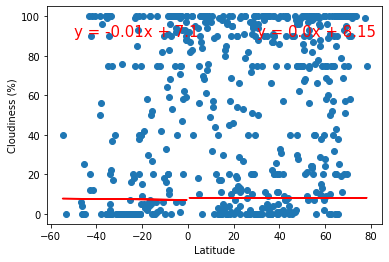

<Figure size 432x288 with 0 Axes>

In [26]:
plot_cloud = df['clouds.all'].tolist()
plt.scatter(plot_lats, plot_cloud)
for n in temps:
    (nslope, nintercept, nrvalue, npvalue, nstderr) = linregress(n[0], n[1])
    nregress_values = n[0] * nslope + nintercept
    line_eq = "y = " + str(round(nslope,2)) + "x + " + str(round(nintercept,2))
    plt.annotate(line_eq,(n[2],90),fontsize=15,color="red")
    plt.plot(n[0],nregress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()
#cloud cover for each city based on their latitude
#There is a greater variation wind speed south of the equator than north
plt.savefig('cloudiness.png')

In [23]:
nlats = north_df['coord.lat']
ntemps = north_df['wind.speed']

slats = south_df['coord.lat']
stemps = south_df['wind.speed']

temps = [(nlats, ntemps, 30), (slats,stemps, -50)]

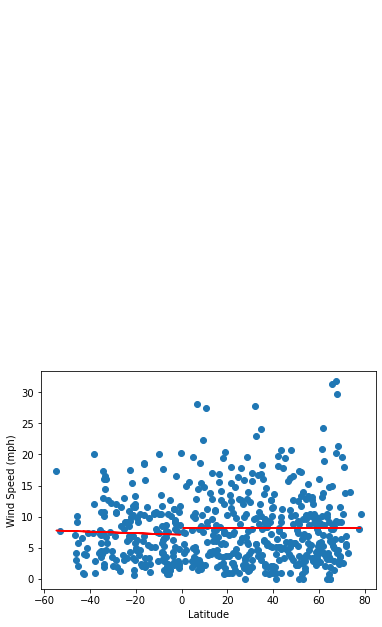

<Figure size 432x288 with 0 Axes>

In [25]:
plot_wind = df['wind.speed'].tolist()
plt.scatter(plot_lats, plot_wind)
for n in temps:
    (nslope, nintercept, nrvalue, npvalue, nstderr) = linregress(n[0], n[1])
    nregress_values = n[0] * nslope + nintercept
    line_eq = "y = " + str(round(nslope,2)) + "x + " + str(round(nintercept,2))
    plt.annotate(line_eq,(n[2],90),fontsize=15,color="red")
    plt.plot(n[0],nregress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
#wind speed based on latitude
#Latitude seems to have little effect on windiness as both lines almost make one lime
plt.savefig('windiness.png')

In [ ]:
#Testing code for above
#north_df = df.loc[df["coord.lat"] > 0, :]
#south_df = df.loc[df["coord.lat"] < 0, :]
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")